In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df = pd.read_csv('flats (5).csv', sep='^')
df

,Общая площадь,Площадь кухни,Этаж,Балкон или лоджия,Тип комнат,Высота потолков,Санузел,Окна,Ремонт,Тёплый пол,...,Местоположение,Ссылка,Жилая площадь,В доме,Отделка,Официальный застройщик,Тип участия,Срок сдачи,Корпус строение,Запланирован снос
0,68 м²,15 м²,11 из 31,балкон,"изолированные, смежные",3.2 м,совмещенный,"во двор, на солнечную сторону",дизайнерский,есть,...,"Москва, Береговой проезд, 5к1",https://www.avito.ru/moskva/kvartiry/2-k._apar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72 м²,13.4 м²,3 из 3,лоджия,изолированные,NaN,раздельный,NaN,NaN,NaN,...,"Москва, Троицкий административный округ, посел...",https://www.avito.ru/selyatino/kvartiry/3-k._k...,43 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59.2 м²,6 м²,2 из 3,NaN,"изолированные, смежные",NaN,раздельный,NaN,косметический,NaN,...,"Ивановская область, Ивановский р-н, Новоталицк...",https://www.avito.ru/novo-talitsy/kvartiry/4-k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78.2 м²,29.1 м²,5 из 9,балкон,изолированные,NaN,раздельный,"во двор, на улицу",евро,NaN,...,"Великий Новгород, улица Якова Павлова, 9",https://www.avito.ru/velikiy_novgorod/kvartiry...,NaN,газ,NaN,NaN,NaN,NaN,NaN,NaN
4,83.5 м²,NaN,12 из 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ул. КИМ, д. 45",https://www.avito.ru/perm/kvartiry/4-k._kvarti...,NaN,NaN,предчистовая,ООО СЗ «СИТИ Проект»,ДДУ по ФЗ 214,Сдача в 3 кв. 2024,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,57.8 м²,10 м²,5 из 15,лоджия,изолированные,NaN,раздельный,на улицу,евро,NaN,...,"Владимирская область, Владимир, ул. Мира, 2В",https://www.avito.ru/vladimir/kvartiry/2-k._kv...,29.9 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3987,50 м²,8 м²,7 из 9,балкон,изолированные,NaN,раздельный,во двор,требует ремонта,NaN,...,"Липецкая область, Липецк, ул. П.И. Смородина, 20",https://www.avito.ru/lipetsk/kvartiry/2-k._kva...,NaN,"мусоропровод, газ",NaN,NaN,NaN,NaN,NaN,NaN
3988,25.9 м²,7.5 м²,1 из 3,балкон,NaN,2.7 м,совмещенный,на улицу,косметический,NaN,...,"муниципальное образование Краснодар, посёлок Р...",https://www.avito.ru/krasnodar/kvartiry/1-k._k...,14.5 м²,газ,NaN,NaN,NaN,NaN,NaN,NaN
3989,11.5 м²,NaN,1 из 5,NaN,NaN,NaN,совмещенный,во двор,евро,NaN,...,"Москва, Мартеновская ул., 22к1",https://www.avito.ru/moskva/kvartiry/kvartira-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Общая площадь           3991 non-null   object 
 1   Площадь кухни           3564 non-null   object 
 2   Этаж                    3988 non-null   object 
 3   Балкон или лоджия       2961 non-null   object 
 4   Тип комнат              2402 non-null   object 
 5   Высота потолков         2053 non-null   object 
 6   Санузел                 3599 non-null   object 
 7   Окна                    3047 non-null   object 
 8   Ремонт                  3477 non-null   object 
 9   Тёплый пол              277 non-null    object 
 10  Мебель                  1297 non-null   object 
 11  Техника                 1021 non-null   object 
 12  Способ продажи          3702 non-null   object 
 13  Вид сделки              2163 non-null   object 
 14  Тип дома                3988 non-null   

In [4]:
df.columns

Index(['Общая площадь', 'Площадь кухни', 'Этаж', 'Балкон или лоджия',
       'Тип комнат', 'Высота потолков', 'Санузел', 'Окна', 'Ремонт',
       'Тёплый пол', 'Мебель', 'Техника', 'Способ продажи', 'Вид сделки',
       'Тип дома', 'Год постройки', 'Этажей в доме', 'Пассажирский лифт',
       'Грузовой лифт', 'Двор', 'Парковка', 'Цена', 'Валюта', 'Местоположение',
       'Ссылка', 'Жилая площадь', 'В доме', 'Отделка',
       'Официальный застройщик', 'Тип участия', 'Срок сдачи',
       'Корпус  строение', 'Запланирован снос'],
      dtype='object')

In [26]:
num_features = ['Цена',
    'Общая площадь', 'Год постройки', 'Этаж', 'Этажей в доме',
]
cat_features = ['Местоположение','Вид сделки', 'Ремонт', 'Окна','Балкон или лоджия','Тип дома', 'Парковка']
target = 'Цена'


In [6]:
df['Местоположение'].value_counts()

ул. КИМ, д. 45                                                                      31
ул. Солнечная, лит. 5                                                               24
ул. Ангарская, стр. 1                                                               13
Москва, Зелёный пр-т, 93                                                            10
Краснодарский край, г.о. Сочи, пос. городского типа Дагомыс, Батумское ш., 28Ак1     9
                                                                                    ..
Московская область, Чехов, Литейная ул., 3                                           1
Краснодарский край, Краснодар, Школьный микрорайон, Школьная ул., 1                  1
Тверская область, Ржевский муниципальный округ, Ржев, ул. Грацинского, 14            1
Республика Татарстан, Набережные Челны, 59-й комплекс, 20                            1
Республика Крым, г.о. Ялта, пос. городского типа Гаспра, Риекская ул., 18            1
Name: Местоположение, Length: 3691, dtype: 

In [38]:
df['Парковка'].value_counts()

открытая во дворе                                                                1544
за шлагбаумом во дворе                                                            251
подземная                                                                         163
открытая во дворе, за шлагбаумом во дворе                                          98
подземная, открытая во дворе                                                       89
подземная, за шлагбаумом во дворе                                                  65
наземная многоуровневая                                                            40
подземная, открытая во дворе, за шлагбаумом во дворе                               32
наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе                 21
наземная многоуровневая, открытая во дворе                                         20
подземная, наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе      14
подземная, наземная многоуровневая                    

In [28]:
df_filtred = df[['Цена', 'Местоположение', 'Общая площадь', 'Год постройки', 'Вид сделки',
       'Ремонт', 'Этаж', 'Этажей в доме', 'Окна','Балкон или лоджия',
       'Тип дома', 'Парковка']]

In [29]:
df_filtred_before = df_filtred.isna().sum()
df_filtred_before

Цена                    3
Местоположение          3
Общая площадь           0
Год постройки        1678
Вид сделки           1828
Ремонт                514
Этаж                    3
Этажей в доме           3
Окна                  944
Балкон или лоджия    1030
Тип дома                3
Парковка             1607
dtype: int64

In [30]:
year_of_const_random = np.random.choice(df_filtred['Ремонт'].dropna(), 3991)
df_filtred['Ремонт'] = df_filtred['Ремонт'].fillna(pd.Series(year_of_const_random))

In [31]:
repair_random = np.random.choice(df_filtred['Вид сделки'].dropna(), 3991)
df_filtred['Вид сделки'] = df_filtred['Вид сделки'].fillna(pd.Series(repair_random))

In [32]:
window_random = np.random.choice(df_filtred['Окна'].dropna(), 3991)
df_filtred['Окна'] = df_filtred['Окна'].fillna(pd.Series(window_random))

In [35]:
balcony_random = np.random.choice(df_filtred['Балкон или лоджия'].dropna(), 3991)
df_filtred['Балкон или лоджия'] = df_filtred['Балкон или лоджия'].fillna(pd.Series(balcony_random))

In [39]:
parking_random = np.random.choice(df_filtred['Парковка'].dropna(), 3991)
df_filtred['Парковка'] = df_filtred['Парковка'].fillna(pd.Series(parking_random))

In [40]:
df_filtred['Год постройки'] = df_filtred['Год постройки'].fillna(df_filtred['Год постройки'].median())

In [41]:
df_filtred.isna().sum()

Цена                 3
Местоположение       3
Общая площадь        0
Год постройки        0
Вид сделки           0
Ремонт               0
Этаж                 3
Этажей в доме        3
Окна                 0
Балкон или лоджия    0
Тип дома             3
Парковка             0
dtype: int64

In [42]:
df_filtred['Парковка'].value_counts()

открытая во дворе                                                                2563
за шлагбаумом во дворе                                                            418
подземная                                                                         275
открытая во дворе, за шлагбаумом во дворе                                         179
подземная, открытая во дворе                                                      148
подземная, за шлагбаумом во дворе                                                 106
наземная многоуровневая                                                            68
подземная, открытая во дворе, за шлагбаумом во дворе                               54
наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе                 42
наземная многоуровневая, открытая во дворе                                         38
подземная, наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе      26
наземная многоуровневая, за шлагбаумом во дворе       

In [44]:
for col in cat_features:
    df_filtred[col] = df_filtred[col].astype('category')
    df_filtred[col] = df_filtred[col].cat.codes
    df_filtred[col] = df_filtred[col].astype(float)

In [45]:
df['Тип дома'].value_counts()

кирпичный              1558
панельный               953
монолитный              780
монолитно-кирпичный     513
блочный                 154
деревянный               30
Name: Тип дома, dtype: int64

In [46]:
df['Балкон или лоджия'].value_counts()

балкон            1402
лоджия            1372
балкон, лоджия     187
Name: Балкон или лоджия, dtype: int64

In [47]:
df['Окна'].value_counts()

во двор                                    1005
на улицу                                    658
во двор, на улицу                           590
во двор, на улицу, на солнечную сторону     338
во двор, на солнечную сторону               193
на улицу, на солнечную сторону              161
на солнечную сторону                        102
Name: Окна, dtype: int64

In [48]:
df['Ремонт'].value_counts()

косметический      1428
евро                970
требует ремонта     736
дизайнерский        343
Name: Ремонт, dtype: int64

In [51]:
df_filtred['Этаж'] = df_filtred['Этаж'].astype(str)
df_filtred['Этаж'] = df_filtred['Этаж'].str.extract(r'(\d+)')
df_filtred['Этаж'] = df_filtred['Этаж'].astype(float)

In [52]:
df_filtred['Общая площадь'] = df_filtred['Общая площадь'].replace(r'\D', '', regex=True)
df_filtred['Общая площадь'] = df_filtred['Общая площадь'].astype(float)

In [53]:
df_filtred.corr()

,Цена,Местоположение,Общая площадь,Год постройки,Вид сделки,Ремонт,Этаж,Этажей в доме,Окна,Балкон или лоджия,Тип дома,Парковка
Цена,1.000000,-0.053231,0.147501,0.006307,0.006049,-0.069166,0.109588,0.131945,0.008713,0.025212,0.035434,0.035279
Местоположение,-0.053231,1.000000,-0.029084,0.002701,-0.009451,-0.027090,0.062022,0.097932,-0.026819,0.012071,0.006093,-0.037440
Общая площадь,0.147501,-0.029084,1.000000,0.002018,-0.001069,0.022512,0.034242,0.036449,0.014274,0.017428,-0.050296,0.044805
Год постройки,0.006307,0.002701,0.002018,1.000000,0.000435,0.006765,0.050161,0.062214,0.004317,0.029241,0.017270,0.012574
Вид сделки,0.006049,-0.009451,-0.001069,0.000435,1.000000,-0.002288,0.003714,0.000544,-0.038781,0.007779,-0.001743,0.021268
Ремонт,-0.069166,-0.027090,0.022512,0.006765,-0.002288,1.000000,-0.096852,-0.105671,0.029295,-0.036074,-0.011735,-0.016003
Этаж,0.109588,0.062022,0.034242,0.050161,0.003714,-0.096852,1.000000,0.683823,0.014132,0.070001,0.149409,0.111040
Этажей в доме,0.131945,0.097932,0.036449,0.062214,0.000544,-0.105671,0.683823,1.000000,-0.023086,0.132554,0.228154,0.150883
Окна,0.008713,-0.026819,0.014274,0.004317,-0.038781,0.029295,0.014132,-0.023086,1.000000,-0.001262,-0.000814,0.038333
Балкон или лоджия,0.025212,0.012071,0.017428,0.029241,0.007779,-0.036074,0.070001,0.132554,-0.001262,1.000000,0.023254,0.048826


In [54]:
df_filtred.corr()['Цена'].apply(np.abs).sort_values(ascending = False)

Цена                 1.000000
Общая площадь        0.147501
Этажей в доме        0.131945
Этаж                 0.109588
Ремонт               0.069166
Местоположение       0.053231
Тип дома             0.035434
Парковка             0.035279
Балкон или лоджия    0.025212
Окна                 0.008713
Год постройки        0.006307
Вид сделки           0.006049
Name: Цена, dtype: float64

In [55]:
df_filtred.isna().sum()

Цена                 3
Местоположение       0
Общая площадь        0
Год постройки        0
Вид сделки           0
Ремонт               0
Этаж                 3
Этажей в доме        3
Окна                 0
Балкон или лоджия    0
Тип дома             0
Парковка             0
dtype: int64

In [56]:
df_filtred_before

Цена                    3
Местоположение          3
Общая площадь           0
Год постройки        1678
Вид сделки           1828
Ремонт                514
Этаж                    3
Этажей в доме           3
Окна                  944
Балкон или лоджия    1030
Тип дома                3
Парковка             1607
dtype: int64

In [57]:
df['Вид сделки'].value_counts()

возможна ипотека                  2150
возможна ипотека, аукцион            7
возможна ипотека, продажа доли       4
аукцион                              1
продажа доли                         1
Name: Вид сделки, dtype: int64

In [59]:
df_filtred['Вид сделки'].value_counts() # нулевые значения = -1

1.0    3969
2.0      15
3.0       5
0.0       1
4.0       1
Name: Вид сделки, dtype: int64

In [58]:
df['Вид сделки'].value_counts()

возможна ипотека                  2150
возможна ипотека, аукцион            7
возможна ипотека, продажа доли       4
аукцион                              1
продажа доли                         1
Name: Вид сделки, dtype: int64

In [56]:
df.isna().sum()

Общая площадь                0
Площадь кухни              427
Этаж                         3
Балкон или лоджия         1030
Тип комнат                1589
Высота потолков           1938
Санузел                    392
Окна                       944
Ремонт                     514
Тёплый пол                3714
Мебель                    2694
Техника                   2970
Способ продажи             289
Вид сделки                1828
Тип дома                     3
Год постройки             1678
Этажей в доме                3
Пассажирский лифт         1531
Грузовой лифт             1894
Двор                      1912
Парковка                  1607
Цена                         3
Валюта                       3
Местоположение               3
Ссылка                       3
Жилая площадь             1208
В доме                    2664
Отделка                   3521
Официальный застройщик    3548
Тип участия               3548
Срок сдачи                3548
Корпус  строение          3675
Запланир

In [60]:
df_filtred.sort_values('Цена', ascending=False)

,Цена,Местоположение,Общая площадь,Год постройки,Вид сделки,Ремонт,Этаж,Этажей в доме,Окна,Балкон или лоджия,Тип дома,Парковка
1844,796788300.0,1306.0,3.450000e+02,2016.0,1.0,3.0,4.0,7.0,3.0,2.0,3.0,7.0
436,400000000.0,1306.0,2.008000e+03,2016.0,1.0,0.0,1.0,7.0,3.0,2.0,3.0,7.0
3663,359999965.0,1052.0,1.877000e+03,2020.0,1.0,3.0,6.0,6.0,6.0,0.0,4.0,5.0
996,355000000.0,1199.0,2.500000e+02,1912.0,1.0,3.0,3.0,6.0,2.0,0.0,2.0,5.0
2443,350000000.0,1351.0,3.050000e+02,2009.0,1.0,1.0,2.0,4.0,5.0,0.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2156,70000.0,1918.0,4.900000e+01,2009.0,4.0,2.0,1.0,4.0,0.0,1.0,2.0,5.0
3730,14990.0,1835.0,6.550000e+02,2019.0,1.0,2.0,11.0,35.0,3.0,2.0,4.0,8.0
1186,NaN,-1.0,2.418222e+51,2009.0,1.0,2.0,NaN,NaN,4.0,0.0,-1.0,13.0
1534,NaN,-1.0,3.718119e+56,2009.0,1.0,2.0,NaN,NaN,5.0,2.0,-1.0,5.0


In [62]:
df_filtred[target].value_counts()

4500000.0     53
6500000.0     48
3500000.0     47
7500000.0     42
4300000.0     41
              ..
6199990.0      1
1440000.0      1
3123290.0      1
75000000.0     1
2999999.0      1
Name: Цена, Length: 1143, dtype: int64

In [61]:
correlation = df_filtred[num_features].corr()
correlation

,Цена,Общая площадь,Год постройки,Этаж,Этажей в доме
Цена,1.000000,0.147501,0.006307,0.109588,0.131945
Общая площадь,0.147501,1.000000,0.002018,0.034242,0.036449
Год постройки,0.006307,0.002018,1.000000,0.050161,0.062214
Этаж,0.109588,0.034242,0.050161,1.000000,0.683823
Этажей в доме,0.131945,0.036449,0.062214,0.683823,1.000000


<AxesSubplot:>

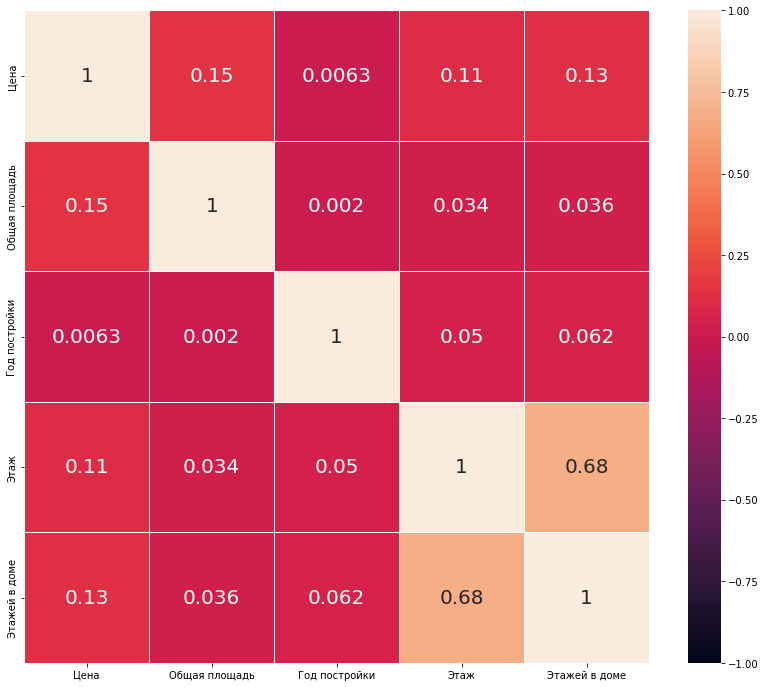

In [62]:
fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(correlation, annot=True, linecolor = 'white', linewidth=0.5,
           annot_kws = {'size' : 20}, vmax = 1, vmin =-1)

In [63]:
df_melted = pd.melt(df_filtred, id_vars='Цена', value_vars=cat_features)

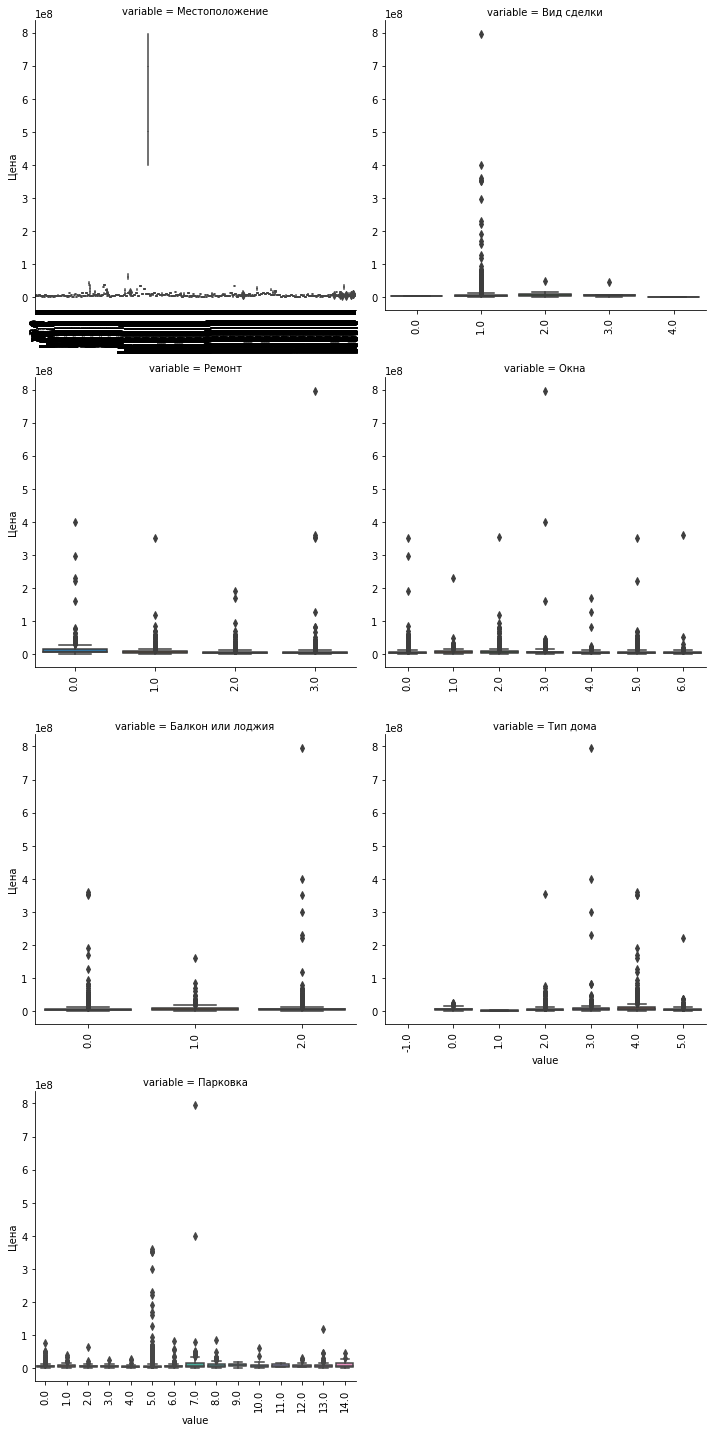

In [64]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

g = sns.FacetGrid(df_melted, col='variable',
                col_wrap=2, sharex=False, sharey=False, height=5)

g.map(boxplot, 'value', 'Цена')

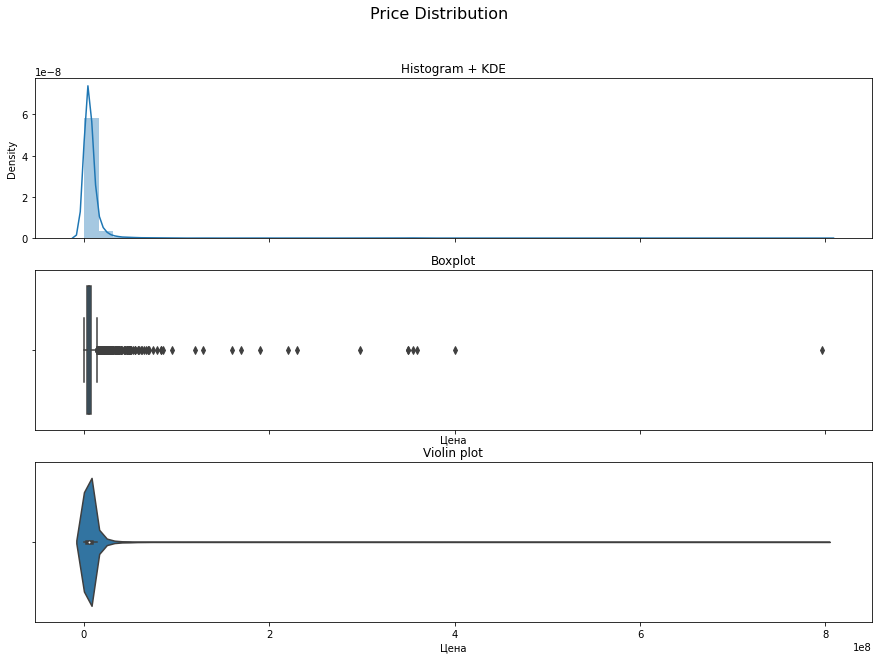

In [65]:
N = 10 **4 
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 10))
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize =16)
    plt.show()


plot_comparison(df_filtred['Цена'], 'Price Distribution')

In [60]:
# можно добавить бинарную переменную инфроструктура

In [57]:
df_cleaned = df.dropna(subset=['Местоположение'])
df_moscow = df_cleaned[df_cleaned['Местоположение'].str.contains('Москва')]
df_moscow

,Общая площадь,Площадь кухни,Этаж,Балкон или лоджия,Тип комнат,Высота потолков,Санузел,Окна,Ремонт,Тёплый пол,...,Местоположение,Ссылка,Жилая площадь,В доме,Отделка,Официальный застройщик,Тип участия,Срок сдачи,Корпус строение,Запланирован снос
0,68 м²,15 м²,11 из 31,балкон,"изолированные, смежные",3.2 м,совмещенный,"во двор, на солнечную сторону",дизайнерский,есть,...,"Москва, Береговой проезд, 5к1",https://www.avito.ru/moskva/kvartiry/2-k._apar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72 м²,13.4 м²,3 из 3,лоджия,изолированные,NaN,раздельный,NaN,NaN,NaN,...,"Москва, Троицкий административный округ, посел...",https://www.avito.ru/selyatino/kvartiry/3-k._k...,43 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22 м²,3 м²,3 из 6,NaN,NaN,NaN,совмещенный,на улицу,требует ремонта,NaN,...,"Москва, 2-я ул. Энтузиастов, 5к39",https://www.avito.ru/moskva/kvartiry/1-k._apar...,15 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,114.3 м²,6 м²,5 из 10,NaN,изолированные,NaN,"совмещенный, раздельный",во двор,требует ремонта,NaN,...,"Москва, Новомосковский административный округ,...",https://www.avito.ru/mosrentgen/kvartiry/5-k._...,70.2 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,22 м²,NaN,1 из 3,NaN,NaN,2.7 м,совмещенный,во двор,косметический,NaN,...,"Москва, Ижорский пр., 11с13",https://www.avito.ru/moskva/kvartiry/kvartira-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,42 м²,9 м²,10 из 17,балкон,NaN,NaN,совмещенный,на улицу,евро,NaN,...,"Москва, Новомосковский административный округ,...",https://www.avito.ru/moskovskaya_oblast_moskov...,NaN,мусоропровод,NaN,NaN,NaN,NaN,NaN,NaN
3961,91.5 м²,12 м²,3 из 17,лоджия,изолированные,NaN,раздельный,"во двор, на улицу",косметический,NaN,...,"Москва, Зеленоград, к847",https://www.avito.ru/moskva_zelenograd/kvartir...,50.9 м²,мусоропровод,NaN,NaN,NaN,NaN,NaN,NaN
3966,40.6 м²,6 м²,10 из 10,лоджия,изолированные,2.6 м,совмещенный,на улицу,евро,NaN,...,"Москва, ул. Панфёрова, 11",https://www.avito.ru/moskva/kvartiry/2-k._kvar...,30 м²,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3969,101 м²,16 м²,18 из 22,балкон,изолированные,NaN,NaN,NaN,евро,NaN,...,"Москва, Веерная ул., 22к3",https://www.avito.ru/moskva/kvartiry/4-k._kvar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 3989
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Общая площадь           365 non-null    object 
 1   Площадь кухни           301 non-null    object 
 2   Этаж                    365 non-null    object 
 3   Балкон или лоджия       201 non-null    object 
 4   Тип комнат              197 non-null    object 
 5   Высота потолков         182 non-null    object 
 6   Санузел                 316 non-null    object 
 7   Окна                    246 non-null    object 
 8   Ремонт                  359 non-null    object 
 9   Тёплый пол              20 non-null     object 
 10  Мебель                  87 non-null     object 
 11  Техника                 74 non-null     object 
 12  Способ продажи          364 non-null    object 
 13  Вид сделки              198 non-null    object 
 14  Тип дома                365 non-null    o